In [2]:
#| hidden: true
#| echo: false
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# some personal style settings to make the plots look nice
# and save some space in the notebook
plt.style.use("../style.mplstyle")

::: {.hidden}
$$
 \renewcommand{\P}{\mathbb{P}}
$$
:::

## Probability
Most of you are probably familiar with the basic intuition of **probability**: essentially it measures how likely an event is to occur. 

In mathematical terms, the probability $\P$ of an event $A$ is defined as:

\begin{align*}
\P(A) &= \frac{\text{ \# of outcomes where } A \text{ occurs}}{\text{ total \# of outcomes}} \\
\end{align*}

By definition this quantity cannot be negative ($\P(A) = 0$ means $A$ never occurs), and it must be less than or equal to 1 ($\P(A) = 1$ means $A$ always occurs).

The classical example of probability is flipping a coin. When you flip a fair coin, there are two possible outcomes: heads ($H$) and tails ($T$). If we let $A$ be the event that the coin lands on heads, then we can compute the probability of $A$ as follows:

\begin{align*}
\P(\text{H}) &= \frac{\text{ \# of heads}}{\text{ total \# of outcomes}} \\
      &= \frac{1}{2} \\
\end{align*}

This matches our intuition that a fair coin has a 50% chance of landing on heads.

### Probability of multiple events
But what if we flip the coin twice? Now there are four possible outcomes: $HH$, $HT$, $TH$, and $TT$. 

If we let $B$ be the event that at least one coin lands on heads, we can compute the probability of $B$ as follows:
\begin{align*}
\P(B) &= \frac{\text{ \# of outcomes with at least one head}}{\text{ total \# of outcomes}} \\
      &= \frac{|\{HH, HT, TH\}|}{|\{HH, HT, TH, TT\}|} \\
      &= \frac{3}{4} \\
\end{align*}


### Addition and multiplication rules (and / or)

What is the probability of getting heads on the first flip AND the second flip (i.e., the event $C = \{HH\}$)?

Well, there is only one outcome where both flips are heads, and there are still four total outcomes. So using our initial approach we know that $\P(C) = \P (H_1 ~\text{and}~ H_2) = \frac{1}{4}$.

What about the probability of getting heads on the first flip OR the second flip? This is actually the same event as $B$ above, so we can use the same calculation: $\P(B) = \P(H_1 ~\text{or}~ H_2) = \frac{3}{4}$.

::: {.callout-note title="Note on notation" collapse="true"}
In the above, we used $H_1$ and $H_2$ to denote heads on the first and second flips, respectively. The notation $H_1 ~\text{and}~ H_2$ means both flips are heads, while $H_1 ~\text{or}~ H_2$ means at least one flip is heads.

In probability theory, we often use the symbols $\cap$ and $\cup$ to denote "and" and "or" respectively. So we could also write $\P(H_1 \cap H_2)$ for the probability of both flips being heads, and $\P(H_1 \cup H_2)$ for the probability of at least one flip being heads. Technically, this is set notation where $\cap$ means intersection (the event where both $H_1$ and $H_2$ occur), while $\cup$ means union (the event where either $H_1$ or $H_2$ occurs).
:::

There are some important rules for calculating probabilities of multiple events. In particular, if you hve two events $A$ and $B$, the following rules hold:

- **Addition rule**: For any two events $A$ and $B$, the probability of either $A$ or $B$ occurring is given by:
  $$
  \P(A \cup B) = \P(A) + \P(B) - \P(A \cap B)
  $$
  This last term, $\P(A \cap B)$, is necessary to avoid double counting the outcomes where both $A$ and $B$ occur.

  Note that if $A$ and $B$ are mutually exclusive (i.e., they cannot both occur at the same time), then $\P(A \cap B) = 0$, and the formula simplifies to:
  $$  \P(A \cup B) = \P(A) + \P(B)$$

:::{.callout-tip title="Visualizing sets of events" collapse="true"}
The following image illustrates the addition rule for two events $A$ and $B$ using a Venn diagram. 
![probability-set](../images/probability-sets-union.jpeg)
:::

- **Multiplication rule**: For any two events $A$ and $B$, the probability of both $A$ and $B$ occurring is given by:
$$\P(A \cap B) = \P(A) \cdot \P(B | A)$$
where $\P(B | A)$ is the conditional probability of $B$ given that $A$ has occurred. This means you first consider the outcomes where $A$ occurs, and then look at the probability of $B$ within that subset.


::: {.callout-tip title="Conditional probability" collapse="false"}
The notation $\P(B | A)$ is read as "the probability of $B$ given $A$". It represents the probability of event $B$ occurring under the condition that event $A$ has already occurred. 

We make these adjustments in our heads all of the time. For example, you might expect that it is more likely I will buy ice cream if it is hot outside. In this case, the event $A$ is "it is hot outside", and the event $B$ is "I buy ice cream". The conditional probability $\P(B | A)$ would be higher than $\P(B)$ on a typical day.

Let's think about this in the context of our coin flips. If we know that the first flip is heads ($H_1$), then only two outcomes are possible ($HH$ and $HT$) instead of four ($HH$, $HT$, $TH$, $TT$). 

So the conditional probability $\P(H_2 | H_1)$, which is the probability of the second flip being heads given that the first flip was heads, is:
\begin{align*}
\P(H_2 | H_1) &= \frac{\text{ \# of outcomes where } H_2 \text{ occurs and } H_1 \text{ has occurred}}{\text{ total \# of outcomes where } H_1 \text{ has occurred}} \\
&= \frac{|\{HH\}|}{|\{HH, HT\}|} \\
&= \frac{1}{2} \\
\end{align*}
:::

The multiplication rule helps us calculate the probability of multiple events happening, as long as we know how one event affects the other (i.e., the conditional probability). An example will help clarify make this concrete.

Consider a deck of cards (52 cards total, 13 of each suit). I might ask you, "What is the probability of drawing a club on the first draw and a club on the second draw? (Assuming you do not replace the first card.)"



In [29]:
# | echo: false
from jupyterquiz import display_quiz

cards_questions = [
    {
        "question": "What is the conditional probability of drawing a club on the second draw given that the first card drawn was a club?",
        "type": "multiple_choice",
        "answers": [
            {"answer": "1/52", "correct": False},
            {"answer": "1/4", "correct": False},
            {"answer": "12/51", "correct": True},
            {"answer": "13/52", "correct": False},
        ],
    },
    {
        "question": "What is the probability of drawing a club on the first draw and a club on the second draw? (Assuming you do not replace the first card.)",
        "type": "numeric",
        "precision": 4,
        "answers": [
            # {"type": "value", "value": 0.0588, "correct": True, "feedback": "Correct! The probability is 13/52 * 12/51 = 1/4 * 12/51 = .0588"},
            {
                "type": "range",
                "range": [0.0550, 0.0620],
                "correct": True,
                "feedback": "Correct! The probability is 13/52 * 12/51 = 1/4 * 12/51 = .0588",
            },
            {
                "type": "default",
                "feedback": "Incorrect. Consider the multiplication rule!",
            },
        ],
    },
]
display_quiz(cards_questions)

<IPython.core.display.Javascript object>



You will see more complicated examples of probability in the assignment for this lecture, but the basic idea is the same: you count the number of outcomes where the event occurs, and divide by the total number of outcomes.

### Independence
Two events $A$ and $B$ are said to be **independent** if the occurrence of one does not affect the probability of the other. 

How does this relate to the multiplication rule? If $A$ and $B$ are independent, then the conditional probability $\P(B | A)$ is simply $\P(B)$. That is, knowing that $A$ has occurred does not change the probability of $B$ occurring.

This means that for independent events, the multiplication rule simplifies to:  
$$\P(A \cap B) = \P(A) \cdot \P(B)$$

Our coin flip example illustrates this nicely. If we flip a fair coin twice, the outcome of the first flip does not affect the outcome of the second flip. Therefore, the two events (the first flip being heads and the second flip being heads) are independent. So the probability of both flips being heads is simply $\P(H_1 \cap H_2) = \P(H_1) \cdot \P(H_2) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$.


## Probability functions

Thinking about probability in terms of counting outcomes is useful, and it is always a good idea to keep that intuition in mind if you ever get stuck. 

However, it is often more convenient to work with **probability functions**. A probability function assigns a probability to each possible outcome. In order to define a probability function, we need to be able to assign numerical values to each outcome. For example, if we have a fair coin, we can define a probability function $f$ as follows:
$$
f(x) = \begin{cases}
    \frac{1}{2} & \text{if } x = 0 \text{ (heads)} \\
    \frac{1}{2} & \text{if } x = 1 \text{ (tails)} \\
    0 & \text{otherwise}
\end{cases}
$$
where $x$ is the outcome of the coin flip (0 for heads, 1 for tails).

::: {.callout-tip title="Functions map inputs to outputs" collapse="true"}
Functions are just a "map" that tells you what output to expect for each input. A probability function is a special type of function that maps inputs to probabilities in the range $[0, 1]$.
:::

This might seem a bit redundant because we're just presenting the same information in a new format. However, one reason that probability functions are important is that they allow us to concisely describe the probability of outcomes that have many possible values. 

For example, if we have a die with six sides, we can define a probability function $f$ as follows:
$$
f(x) = \begin{cases}
    \frac{1}{6} & \text{if } x = 1, 2, 3, 4, 5, 6 \\
    0 & \text{otherwise}
\end{cases}
$$ 

But we can also use the same function to describe the probability of rolling a die with any number of sides. For example, if we have a die with $k$ sides, we can define a probability function $f$ as follows:

$$
f(x) = \begin{cases}
    \frac{1}{k} & \text{if } x = 1, 2, \ldots, k \\
    0 & \text{otherwise}
\end{cases}
$$
This is much more concise than writing out the probability for each possible outcome, and it allows us to easily generalize to any number of sides.

```{pyodide}
#| exercise: uniform-pdf
#| caption: Implement a discrete uniform probability function. Assume inputs are integers.
#| echo: true

# Define your function below
def f(x, k):
    # your code here
    pass

# Example usage:
# print(f(1, 5))  # Expected output: 0.2
```

```{pyodide}
#| exercise: uniform-pdf
#| check: true

# Define test cases
test_cases = [
    (1, 5, 0.2),
    (5, 5, 0.2),
    (6, 5, 0),
    (0, 5, 0),
    (3, 3, 1/3),
    (4, 3, 0)
]

# Initialize feedback
feedback = {"correct": True, "message": "Great job!"}

# Check if function 'f' is defined
if 'f' not in globals():
    feedback = {"correct": False, "message": "Function 'f' is not defined."}
else:
    for x, k, expected in test_cases:
        try:
            result = f(x, k)
            if abs(result - expected) > 1e-6:
                feedback = {
                    "correct": False,
                    "message": f"Test failed: f({x}, {k}) returned {result}, expected {expected}."
                }
                break
        except Exception as e:
            feedback = {
                "correct": False,
                "message": f"Error when calling f({x}, {k}): {e}"
            }
            break

feedback
```

```{pyodide}
#| exercise: uniform-pdf
#| solution: true

def f(x, k):
    if 1 <= x <= k:
        return 1 / k
    else:
        return 0
```

## Random Variables

A random variable is a quantity that can take on different values based on the outcome of a random event. It might be a discrete variable (like the outcome of a coin flip) or a continuous variable (like the height of a person). Basically it is an quantity that has randomness associated with it. We denote random variables with capital letters, like $X$ or $Y$. The specific values that a random variable can take on in a particular instance are usually denoted with lowercase letters, like $x$ or $y$. 

We use **probability functions** to describe the probabilities associated with random variables. Specifically, a probability function $f$ for a random variable $X$ gives the probability that $X$ takes on a specific value $x$. 

For example, let $X$ be a random variable that represents the outcome of flipping a fair coin. The probability function for $X$ would be:
$$
f(x) = \P (X = x) = \begin{cases}
    \frac{1}{2} & \text{if } x = 0 \text{ (heads)} \\
    \frac{1}{2} & \text{if } x = 1 \text{ (tails)} \\
    0 & \text{otherwise}
\end{cases}
$$

::: {.callout-note title="Bernoulli random variable" collapse="true"}
The above is an example of a **Bernoulli random variable**, which takes on the value 1 with probability $p$ and the value 0 with probability $1 - p$. In our case, $p = \frac{1}{2}$ for a fair coin.
:::

As mentioned above, we can also think about random variables with continuous values. For example, let $Y$ be a random variable that represents the height of a person in centimeters. Let's assume that every person's height is equally likely to be between 150 cm and 200 cm (this is not true of course). The probability function for $Y$ would be:
$$
f(y) = \P (Y = y) = \begin{cases}
    \frac{1}{50} & \text{if } 150 \leq y \leq 200 \\
    0 & \text{otherwise}
\end{cases}
$$

::: {.callout-note title="Uniform random variable" collapse="true"}
The above is an example of a **uniform random variable**, which takes on values in a continuous range with equal probability. In our case, the range is from 150 cm to 200 cm, and the probability density function is $\frac{1}{50}$.
:::


In statistics, we treat our data as a random variable (or a collection of random variables). What this means is that we assume that the data we observe is just one possible outcome of a random process.

This is a powerful assumption because it allows us to use probability theory to make inferences about the underlying process that generated the data. This is going to be a key idea in the next lecture and throughout the course.

## Probability distributions and histograms

We call the probability function for a random variable a **probability distribution**, which describes how the probabilities are distributed across the possible values of the random variable.

Distributions can be discrete or continuous, depending on the type of random variable. For discrete random variables, the probability distribution is often represented as a **probability mass function (PMF)**, which gives the probability of each possible value. For continuous random variables, the probability distribution is represented as a **probability density function (PDF)**, which gives the density of probability at each point.

Let's say we have a random variable $X$, but we don't know the exact probability function. Instead, we have a set of observed data points $\{x_1, x_2, \ldots, x_n\}$ that we believe are individual realizations of $X$. In other words, we have a sample of data that we think is representative of the underlying random variable.

How can we visualize this data to understand the distribution of $X$? The simplest solution is to just plot how many times each value occurs in the data. This is called a **histogram**. 



Text(0, 0.5, 'Frequency')

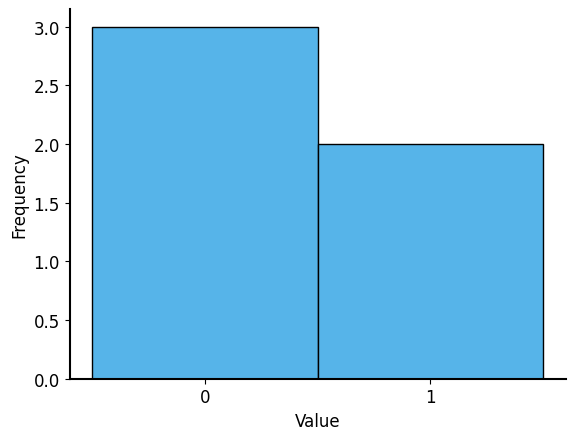

In [28]:
#| echo: true
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0, 0, 1, 1, 0])

plt.hist(x, bins=np.arange(-0.5, 2.5, 1), density=False, align="mid")
plt.xticks([0, 1])
plt.xlabel('Value')
plt.ylabel('Frequency')

The **histogram** is a graphical representation that summarizes the distribution of a dataset. It divides the data into discrete, equally-sized intervals (or "bins") along the x-axis and counts how many data points fall into each bin. The height of each bar represents the either the total count of data points in that bin or the proportion of data points in that bin. If the height of the bar is the proportion, then the area of the bar represents the probability of the random variable falling within that bin.

Consider a bunch of dice rolls. If we roll a die 100 times, we would expect to see each number appear roughly a similar number of times. If we plot the histogram of the data, we would see a discrete uniform distribution, where each number from 1 to 6 has approximately the same height in the histogram. Let's check it out:


In [17]:
#| echo: false
#| hidden: true
#| execute: false
rng = np.random.default_rng(42)  # Create a random number generator with a fixed seed
# sample 100 dice rolls from a uniform distribution
dice_rolls = rng.integers(1, 7, size=1000)
dice_rolls_df = pd.DataFrame(dice_rolls, columns=["rolls"])
dice_rolls_df.to_csv("../data/dice_rolls.csv", index=False)

In [18]:
# load in the dice rolls data
dice_rolls_df = pd.read_csv("../data/dice_rolls.csv")
print("Total number of dice rolls:", len(dice_rolls_df))
dice_rolls_df.head(10)

Total number of dice rolls: 1000


,rolls
0,1
1,5
2,4
3,3
4,3
5,6
6,1
7,5
8,2
9,1


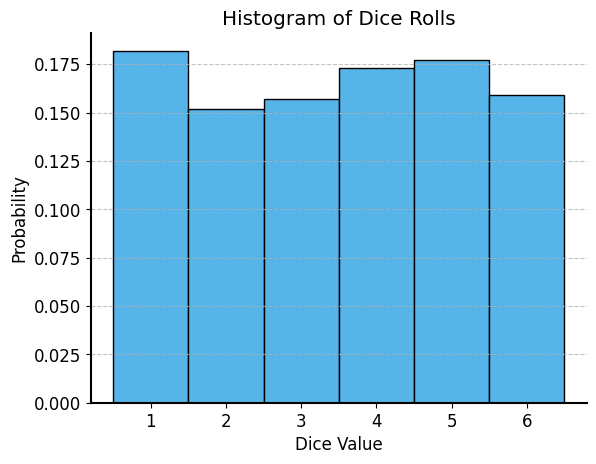

In [20]:
plt.hist(dice_rolls_df['rolls'], bins=np.arange(0.5, 7.5, 1), density=True)
plt.title('Histogram of Dice Rolls')
plt.xlabel('Dice Value')
plt.ylabel('Probability')
plt.xticks(np.arange(1, 7))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Expectation 

We are often interested in the **average** value of a random variable. For example, if we play roulette, we might want to know the average amount of money we can expect to win or lose per game.

Why do we need an average? Since a random variable can take on many different values, a single sample does not give you a lot of information. You might win hundreds of dollars on one game, but this does not mean you will win that much every time you play. 

Instead, think about what would happen if we repeated the random process many times and took the average. Values that occur more frequently will tend to have a larger impact on the average, while values that occur less frequently will have a smaller impact. For example, at a casino roulette table perhaps you place a bet that has a 10% chance of winning. You might bet $1 and win $10 ($9 net profit) on one game, but if you lose $1 on the next 9 games you're not making money in the long run. Even though $9 profit sounds great, the fact that it happens so infrequently (and you lose $1 90% of the time) means that your average profit is actually zero. 

:::{.callout-warning title="Gambling warning: the house always wins" collapse="true"}
Actually, at real casinos, the games are designed so that "the house always wins" in the long run. So they would not let you bet $10 to win $100 ($90 profit) with a 10% chance -- they would give you worse odds, like a 9% chance of winning $100 for a $10 bet.

In the short term this is hardly noticeable -- you're actually quite likely to win a few times! But in the long term, the house edge means that you will lose money if you keep playing. This is why casinos are profitable businesses.
:::

We can formalize this idea that the average gives more weight to values that occur more frequently.

The **expectation** (or expected value) of a random variable $X$ is gives the average value of $X$ over many instances. It is denoted as $\mathbb{E}[X]$ or $\mu_X$. The expectation is calculated as follows:
$$
\mathbb{E}[X] = \sum_{x} x \cdot f(x)
$$
where $f(x)$ is the probability function of $X$. For continuous random variables, the sum is replaced with an integral:
$$
\mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f(x) \, dx
$$

The way to think about this is that the expectation is a weighted average of all possible values of $X$, where the weights are the probabilities of each value.

So in our roulette example, you can either lose \$1 (with 90\% probability) or win \$9 (with 10\% probability). The expectation would be:
$$
\begin{align*}
\mathbb{E}[X] &= \sum_{x \in \{-1, 10\}} x \cdot f(x) \\
&= (-1) \cdot 0.9 + (10-1) \cdot 0.1 \\
&= -0.9 + 0.9 \\
&= 0
\end{align*}
$$

This is also the same as what you get if you just take the average of the outcomes. Say we play roulette 10 times, and we win \$10 on one game and lose \$1 on the other 9 games. The average outcome is:
$$
\begin{align*}
\frac{1}{10} \left( -1 \cdot 9 + 9 \cdot 1 \right) &= -1 \cdot 0.9 + 9 \cdot 0.1 \\
&= -0.9 + 0.9 \\
&= 0
\end{align*}
$$

So for a finite dataset, or set of outcomes, we can estimate the expected value by taking the average of the outcomes. This is often written as $\bar{X}$, and referred to as the sample mean. 
$$
\mathbb{E}[X] \approx \bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

This approximation becomes more accurate as the number of samples $n$ increases. We will talk about this more in a future lecture.

## Variance and standard deviation

The average is a useful summary of a random variable's central tendency, but it does not tell us anything about how spread out the values are. 

Consider the roulette example again. If we play roulette many times, it does not matter how much we bet on each game -- the **average** amount we can expect to win or lose is always zero. You can bet $1 or $10,000 on each game, but the average outcome is still zero.

Of course, the outcome of each game is not zero. Sometimes you win, sometimes you lose, and the amount you win or lose changes drastically depending on how much you bet.



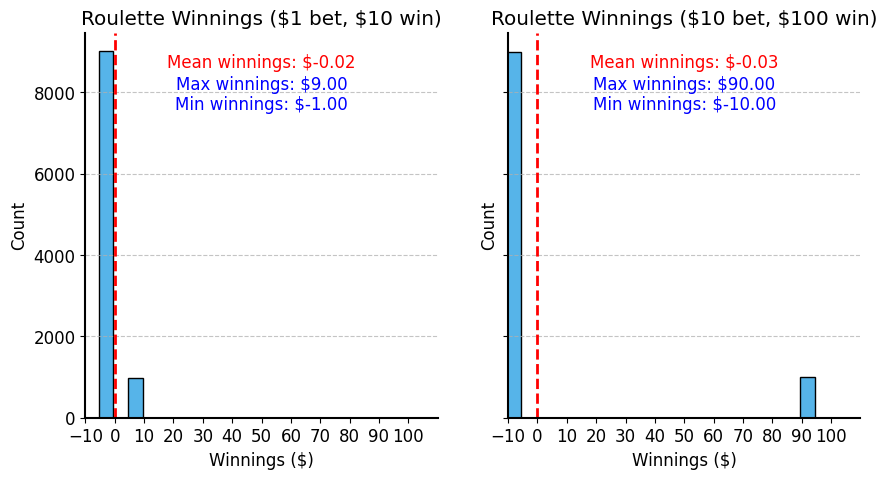

In [39]:
#| echo: false

roulette_outcomes_1 = np.random.binomial(
    n=1,  # number of games played
    p=0.1,   # probability of winning each game
    size=10000  # number of simulations
)
roulette_outcomes_2 = np.random.binomial(
    n=1,  # number of games played
    p=0.1,   # probability of winning each game
    size=10000  # number of simulations
)
roulette_winnings_1 = np.where(roulette_outcomes_1 == 1, 9, -1)  # $10 win for each win, $1 loss for each loss

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].hist(roulette_winnings_1, bins=np.arange(-10.5, 110.5, 5))
ax[0].set_title('Roulette Winnings (\\$1 bet, \\$10 win)')
ax[0].set_xlabel('Winnings ($)')
ax[0].set_ylabel('Count')
ax[0].set_xticks(np.arange(-1, 11, 1))
ax[0].grid(axis='y', alpha=0.75)
ax[0].annotate("Mean winnings: ${:.2f}".format(np.mean(roulette_winnings_1)),
               xy=(0.5, 0.91), xycoords='axes fraction',
               ha='center', fontsize=12, color='red')
ax[0].annotate("Max winnings: ${:.2f}\nMin winnings: ${:.2f}".format(np.max(roulette_winnings_1), np.min(roulette_winnings_1)),
               xy=(0.5, 0.8), xycoords='axes fraction',
               ha='center', fontsize=12, color='blue')

ax[0].axvline(np.mean(roulette_winnings_1), color='red', linestyle='--', label='Mean')

roulette_winnings_2 = np.where(roulette_outcomes_2 == 1, 90, -10)  # $100 win for each win, $10 loss for each loss
ax[1].hist(roulette_winnings_2, bins=np.arange(-10.5, 110.5, 5))
ax[1].set_title('Roulette Winnings (\\$10 bet, \\$100 win)')
ax[1].set_xlabel('Winnings ($)')
ax[1].set_ylabel('Count')
ax[1].set_xticks(np.arange(-10, 110, 10))
ax[1].set_xlim(-10, 110)
ax[1].annotate("Mean winnings: ${:.2f}".format(np.mean(roulette_winnings_2)),
               xy=(0.5, 0.91), xycoords='axes fraction',
               ha='center', fontsize=12, color='red')
ax[1].annotate("Max winnings: ${:.2f}\nMin winnings: ${:.2f}".format(np.max(roulette_winnings_2), np.min(roulette_winnings_2)),
               xy=(0.5, 0.8), xycoords='axes fraction',
               ha='center', fontsize=12, color='blue')
ax[1].axvline(np.mean(roulette_winnings_2), color='red', linestyle='--', label='Mean')

plt.grid(axis='y', alpha=0.75)
plt.show()

How can we quantify this spread? Meaning, we want to capture that even though the average outcome is zero, winning $90 and losing $10 is very different from winning $9 and losing $1. Maybe you want to pay for dinner with your winnings, so a $90 payout is much more useful than a $9 payout. Or maybe you only have $10 in your pocket, so you can't afford to lose all of it on a single game.

We need a statistic that captures the typical *distance* between the values of the random variable and the average value. 

:::{.callout-note title="Why distance from the average?" collapse="true"}
Let's imagine for a moment that there was a casino (a very poorly run casino) that let you place bets that win no matter what -- the only question is how much you win. Let's take an example where the payouts still differ by $10: you get $5 if you "lose" and $15 if you "win".

In this case, the expected value is:
$$
\mathbb{E}[X] = \sum_{x} x \cdot f(x) = 5 \cdot 0.9 + 15 \cdot 0.1 = 4.5 + 1.5 = 6
$$
So you can expect to win $6 per game on average. 

The amount that the winnings vary, though is exactly the same as the original roulette game. How can we replicate this notion mathematically?

The answer is simple: we subtract the average from each value of $X$:
$$X' = X - \mathbb{E}[X]$$
This gives us a new random variable $X'$ that represents the distance from the average. Notice that this new random variable has an average of zero, just like the original roulette game.

$$\mathbb{E}[X'] = \sum_{x} (x - \mathbb{E}[X]) \cdot f(x) = ((5-6) \cdot 0.9 + (15-6) \cdot 0.1 = (-1) \cdot 0.9 + (9) \cdot 0.1 = -0.9 + 0.9 = 0$$

or more generally:
$$\mathbb{E}[X'] = \mathbb{E}[X - \mathbb{E}[X]] = \mathbb{E}[X] - \mathbb{E}[X] = 0$$
:::

So let's compute exactly that - the distance from the average. The formula for distance between two vectors $x$ and $y$ is:
$$
d^2 = \sum_{i} (x_i - y_i)^2
$$
where $x_i$ and $y_i$ are the elements of the two vectors. This is like the Pythagorean Theorem for computing the length of athe hypotenuse of a triange ($a^2 + b^2 = c^2$).

In our case, we want to compute the distance between the values of the random variable $X$ and the average value $\mathbb{E}[X]$.
$$
d^2 = \sqrt{\sum_x (x - \mathbb{E}[X])^2}
$$

Now we're getting somewhere! However, this is adding up all of the squared distances -- that means that the more values we have, the larger the distance will be. This is not quite right -- instead we want to compute the average distance from the mean in order to get a sense of how spread out the values *typically* are. 

So we need to divide by the number of values:
$$
d^2_\text{avg} = \frac{1}{n} \sum_x (x - \mathbb{E}[X])^2
$$

Something should feel familiar about this expression. Recall that the average is related to the expectation. 
If we replace the average with the expectation, we get the formula for the **variance** of a random variable $X$:
$$
\text{Var}(X) = \sigma^2(X) = \mathbb{E}[(X - \mathbb{E}[X])^2] = \sum_x (x - \mathbb{E}[X])^2 \cdot f(x)
$$

The variance tells us how spread out the values of a random variable are around the average. A larger variance means that the values are more spread out, while a smaller variance means that the values are closer to the average.

The variance is a useful statistic, but it is not in the same units as the original random variable. For example, if $X$ represents the amount of money you win or lose in dollars, then the variance is in dollars squared. This can make it difficult to interpret. So we often take the square root of the variance to get the **standard deviation**:

$$
\text{SD}(X) = \sigma(X) = \sqrt{\text{Var}(X)} = \sqrt{\mathbb{E}[(X - \mathbb{E}[X])^2]}
$$

Like with expected value, we can replace the expectation with the sample mean to get an estimate of the standard deviation (or variance) from a finite dataset:
$$
\hat{\sigma}(X) = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{X})^2}
$$

:::{.callout-note title="Sample variance vs. population variance" collapse="true"}
Technically, the formula above is an imperfect estimate of the population standard deviation.
It's in general a little bit too small, because the sample mean $\bar{X}$ does not perfectly represent the population mean $\mathbb{E}[X]$. We can correct for this by dividing by $n-1$ instead of $n$:
$$
\hat{\sigma}(X) = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{X})^2}
$$
This is called the **sample standard deviation**. 

Why is the initial estimate too small? In a small dataset, the sample mean "overfits" the data, meaning it is closer to the individual data points than the true population mean. Let's think about this in terms of coin flips. If we flip a coin once, the sample mean is either $\hat{X}=0$ or 1, depending on whether we got heads or tails. But the true population mean is $\mathbb{E}[X]=\frac{1}{2}$. If we compute the standard deviation using the original formula, the distance from the sample mean is exactly 0! So the standard deviation is also 0 (either $(1-1)^2$ or $(0-0)^2$).

By contrast, the true (population) standard deviation is $\sigma(X) = \sqrt{\mathbb{E}[(X - \mathbb{E}[X])^2]} = \sqrt{\frac{1}{4}} = \frac{1}{2}$, which is larger than the estimate using the sample mean.

This **bias** in computing the standard deviation gets smaller as the sample size $n$ increases, so for large datasets the difference is negligible. In smaller datasets, though, it is important to use the $n-1$ correction to get a more accurate estimate of the population standard deviation.
:::



## Summary
This lecture introduced many important concepts from probability theory that will be useful throughout the course. 
Probability gives us a mathematical language and toolkit for reasoning about uncertainty and randomness in data, by thinking about possible outcomes and their likelihoods.

In particular, we covered:
- The basic definition of probability and how to compute it for simple events.
- The addition and multiplication rules for calculating probabilities of multiple events.
- The concept of independence and how it affects probabilities.
- Random variables and their probability distributions
- The expectation (or expected value) of a random variable
- Variance and standard deviation

Going forward, these concepts will be foundational for statistical modeling and designing good simulations and statistical tests.

Assignment 2 will give you a chance to work through some of these concepts in more detail, so be sure to check it out!